# Part I - Prosper Loan Data Exploration
## by Belmadoui Sabri





## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!cp '/content/gdrive/MyDrive/prosperLoanData.csv' '/content/'

In [31]:
# We start by loading the data
df = pd.read_csv('/content/prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [32]:
# Now we check for the shape
df.shape

(113937, 81)

We can see that the data has 81 colummns, so for the sake of this study we will take only these columns:


*   **LoanStatus**: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

*   **BorrowerRate**:The Borrower's interest rate for this loan. 
*   **ProsperRating (Alpha)**: The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
*   **Term**: The length of the loan expressed in months.
*   **ListingCategory (numeric)**: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
*   **EmploymentStatus**: The employment status of the borrower at the time they posted the listing.
*   **DelinquenciesLast7Years**: Number of delinquencies in the past 7 years at the time the credit profile was pulled.
*   **StatedMonthlyIncome**: The monthly income the borrower stated at the time the listing was created.
*   **TotalProsperLoans**: Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans. 
*   **LoanOriginalAmount**: The origination amount of the loan.
*   **Recommendations**: Number of recommendations the borrower had at the time the listing was created.
*   **Investors**: The number of investors that funded the loan.
*   **LoanOriginationDate**: The date the loan was originated.



In [33]:
# here we put the Selected_columns in an array 
selected_columns =  [
     'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)','Term', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
     'Recommendations', 'Investors','LoanOriginationDate'
]

In [34]:
# and we use them here two filter only what we want
new_df = df[selected_columns]

In [35]:
new_df.head()

,LoanStatus,BorrowerRate,ProsperRating (Alpha),Term,ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors,LoanOriginationDate
0,Completed,0.1580,NaN,36,0,Self-employed,4.0,3083.333333,NaN,9425,0,258,2007-09-12 00:00:00
1,Current,0.0920,A,36,2,Employed,0.0,6125.000000,NaN,10000,0,1,2014-03-03 00:00:00
2,Completed,0.2750,NaN,36,0,Not available,0.0,2083.333333,NaN,3001,0,41,2007-01-17 00:00:00
3,Current,0.0974,A,36,16,Employed,14.0,2875.000000,NaN,10000,0,158,2012-11-01 00:00:00
4,Current,0.2085,D,36,2,Employed,0.0,9583.333333,1.0,15000,0,20,2013-09-20 00:00:00


In [36]:
# Checking the data, types ...ect
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanStatus                 113937 non-null  object 
 1   BorrowerRate               113937 non-null  float64
 2   ProsperRating (Alpha)      84853 non-null   object 
 3   Term                       113937 non-null  int64  
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   EmploymentStatus           111682 non-null  object 
 6   DelinquenciesLast7Years    112947 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   TotalProsperLoans          22085 non-null   float64
 9   LoanOriginalAmount         113937 non-null  int64  
 10  Recommendations            113937 non-null  int64  
 11  Investors                  113937 non-null  int64  
 12  LoanOriginationDate        113937 non-null  object 
dtypes: float64(4), int64(5), obje

In [37]:
# Still checking ...
new_df.describe()

,BorrowerRate,Term,ListingCategory (numeric),DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors
count,113937.000000,113937.000000,113937.000000,112947.000000,1.139370e+05,22085.000000,113937.00000,113937.000000,113937.000000
mean,0.192764,40.830248,2.774209,4.154984,5.608026e+03,1.421100,8337.01385,0.048027,80.475228
std,0.074818,10.436212,3.996797,10.160216,7.478497e+03,0.764042,6245.80058,0.332353,103.239020
min,0.000000,12.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.00000,0.000000,1.000000
25%,0.134000,36.000000,1.000000,0.000000,3.200333e+03,1.000000,4000.00000,0.000000,2.000000
50%,0.184000,36.000000,1.000000,0.000000,4.666667e+03,1.000000,6500.00000,0.000000,44.000000
75%,0.250000,36.000000,3.000000,3.000000,6.825000e+03,2.000000,12000.00000,0.000000,115.000000
max,0.497500,60.000000,20.000000,99.000000,1.750003e+06,8.000000,35000.00000,39.000000,1189.000000


Assessemnt: 
*  TotalProsperLoans: number of prosper loan with null values replace with -1
*  ProsperRating (Alpha): Nan for before 2009
*  EmploymentStatus: contains not available
*  LoanOriginationDate: type is object.

In [38]:
# We check for the number of null values
new_df.TotalProsperLoans.isna().sum()

91852

In [39]:
# We replace nan vlues with 0
new_df.TotalProsperLoans = new_df.TotalProsperLoans.replace(np.nan, 0)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [40]:
# Now we test for -1 values
new_df.TotalProsperLoans.value_counts()

0.0    91853
1.0    15538
2.0     4540
3.0     1447
4.0      417
5.0      104
6.0       29
7.0        8
8.0        1
Name: TotalProsperLoans, dtype: int64

In [41]:
# After that, we look for the prosperRating we check null values
new_df['ProsperRating (Alpha)'].isna().sum()

29084

In [42]:
# We will just drop them
new_df = new_df.dropna(subset=['ProsperRating (Alpha)']).reset_index()

In [43]:
# We test Now
new_df['ProsperRating (Alpha)'].isna().sum()

0

In [44]:
# We check now for the not available in the employement status 
new_df[new_df.EmploymentStatus == 'Not available']

# We see that the problem is gone since we dropped the ProsperRating (Alpha) the not available values dropped
# since they were linked

,index,LoanStatus,BorrowerRate,ProsperRating (Alpha),Term,ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors,LoanOriginationDate


In [45]:
# Lastly, we need to change the type of LoanOriginationDate' to date time
new_df['LoanOriginationDate'] = pd.to_datetime(new_df['LoanOriginationDate'])

In [46]:
# And we check
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      84853 non-null  int64         
 1   LoanStatus                 84853 non-null  object        
 2   BorrowerRate               84853 non-null  float64       
 3   ProsperRating (Alpha)      84853 non-null  object        
 4   Term                       84853 non-null  int64         
 5   ListingCategory (numeric)  84853 non-null  int64         
 6   EmploymentStatus           84853 non-null  object        
 7   DelinquenciesLast7Years    84853 non-null  float64       
 8   StatedMonthlyIncome        84853 non-null  float64       
 9   TotalProsperLoans          84853 non-null  float64       
 10  LoanOriginalAmount         84853 non-null  int64         
 11  Recommendations            84853 non-null  int64         
 12  Inve

In [47]:
# here we drop the index column ( we don't need it)
new_df.drop('index', axis=1, inplace=True)

In [48]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   LoanStatus                 84853 non-null  object        
 1   BorrowerRate               84853 non-null  float64       
 2   ProsperRating (Alpha)      84853 non-null  object        
 3   Term                       84853 non-null  int64         
 4   ListingCategory (numeric)  84853 non-null  int64         
 5   EmploymentStatus           84853 non-null  object        
 6   DelinquenciesLast7Years    84853 non-null  float64       
 7   StatedMonthlyIncome        84853 non-null  float64       
 8   TotalProsperLoans          84853 non-null  float64       
 9   LoanOriginalAmount         84853 non-null  int64         
 10  Recommendations            84853 non-null  int64         
 11  Investors                  84853 non-null  int64         
 12  Loan

### What is the structure of your dataset?

> In this dataset, there are 84853 instances with 13 columns ('LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)','Term', 'ListingCategory (numeric)', 'EmploymentStatus','DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount','Recommendations', 'Investors','LoanOriginationDate'). some of these columns are numerical, some are strings, and one column is a dateTime type.

### What is/are the main feature(s) of interest in your dataset?

> i am trying to find out if the status of the borrowers affect the chances of getting a loan/number of investor.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> i predict that the EmploymentStatus, ListingCategory, StatedMonthlyIncome play a big part in chances of getting some investors and a loan.

## Univariate Exploration




### Loan status

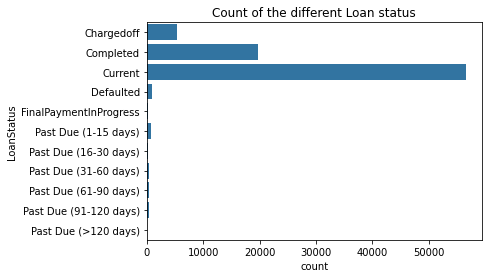

In [49]:
# we set the default color 
default_color = sb.color_palette()[0]

# and draw the plot using seaborn countplot
sb.countplot(data=new_df, y=new_df['LoanStatus'].sort_values(), color= default_color)
plt.title('Count of the different Loan status');

We can observe that most of the loan that are present in the dataset are current (over 50000 instances), followed by completed and charged off loans.
this shows that the majority of the loans given are still in current time.

### Term

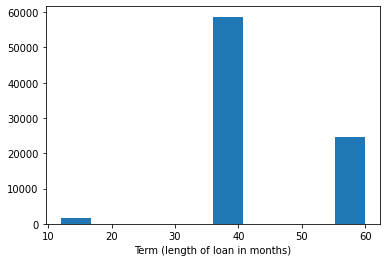

In [50]:
plt.hist(data=new_df, x='Term')
plt.xlabel('Term (length of loan in months)');

# we can see that the term's in this data set all fall in 3 values 
# So it's best if we visualized it using countplot

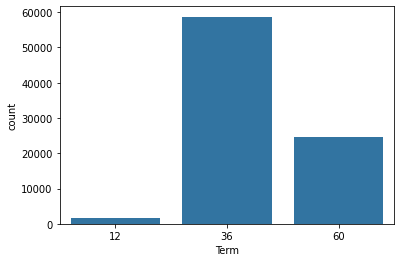

In [51]:
default_color = sb.color_palette()[0]
sb.countplot(data=new_df, x='Term', color=default_color);

We notice that the length of the loans usually are in the 36 month periode, followed by 60 month an lastly, at the least 12 month.

### EmploymentStatus

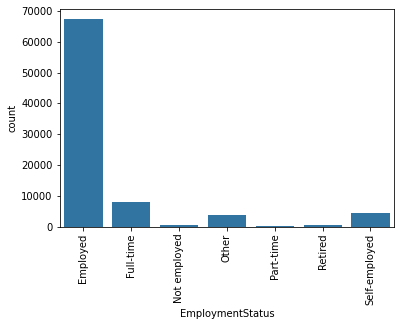

In [52]:
default_color= sb.color_palette()[0]

sb.countplot(data=new_df, x=new_df['EmploymentStatus'].sort_values(), color=default_color)
plt.xticks(rotation=90);

After plotting, we find that the Employed borrowers represent the majority in our dataset, with a small amount of not-employed, retired and part-time individuals

### TotalProsperLoans

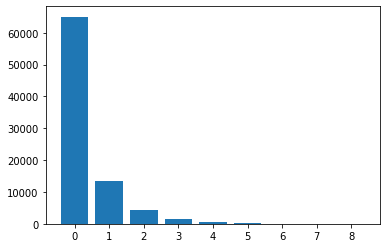

In [53]:
from pandas._libs.hashtable import value_count
plt.bar(new_df['TotalProsperLoans'].value_counts().index, new_df['TotalProsperLoans'].value_counts())
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8]);

From our observation we notice:
*  that most of borrowers didn't have a previous loans (value = 0) 
*  other borrowers have already had either 1, 2, 3 previous loans with a small quantity of borrowers have more previous loans than that (maximum 8)

### StatedMonthlyIncome

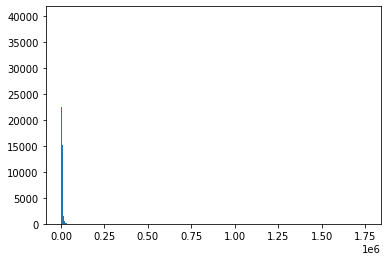

In [54]:
plt.hist(data=new_df, x='StatedMonthlyIncome', bins=500);

# we can see that the plot is small, we need to zoom in
# we can see that the plot doesn't go pass 0.50 so we will set that the limit

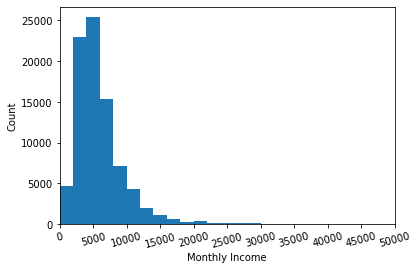

In [55]:
binss = np.arange(0, new_df['StatedMonthlyIncome'].max(), 2000)
ticks = np.arange(0,50000+5000, 5000)

plt.hist(data=new_df, x='StatedMonthlyIncome', bins=binss)
plt.xlim(0, 50000)
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.xticks(ticks, ticks, rotation=15);


We notice that the plot is right skewed, with the mode (most frequent income) is 5000. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We noticed that the majority of the borrowers didn't have any previous loans, plus more than 60000 of them are employed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> We saw that in the stated monthly income the data was right skewed, on top of that it had some outliers. when we zoomed in on our area of intrest we found that the mode for the monthly income is 5000.

## Bivariate Exploration



<AxesSubplot:>

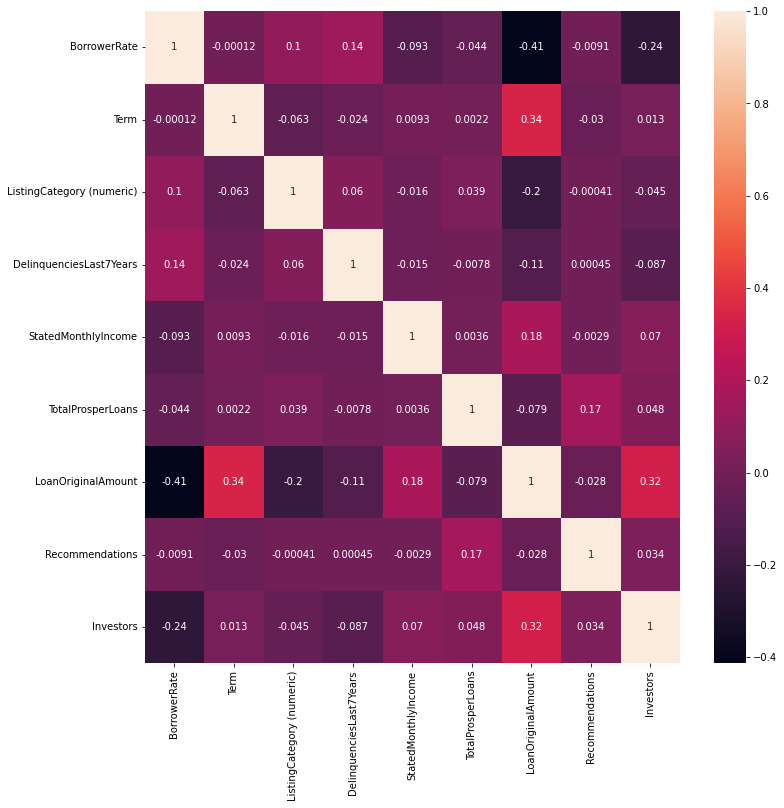

In [56]:
# First we need to plot a correlation heatmap
#to see if we see any correlation between our columns
plt.figure(figsize=(12,12))
sb.heatmap(new_df.corr(), annot=True)

we notice that the only noticible correlation is between loanOriginalAmount & Term and loanOriginalAmount & Investors

### LoanStatus & ProsperRating

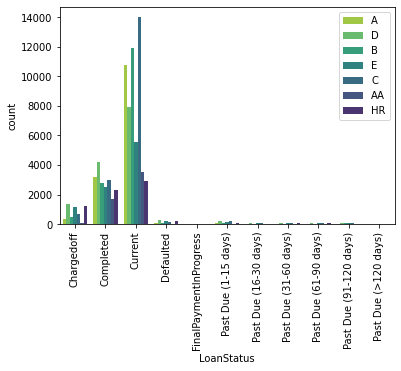

In [57]:
sb.countplot(data=new_df, x = new_df['LoanStatus'].sort_values(), hue = 'ProsperRating (Alpha)', palette = 'viridis_r')
plt.xticks(rotation=90)
plt.legend(loc='upper right');

# we can see that the  right side of the plot isn't filled with benificial data so we will just look into 
# the current , defaulted, chargedoff, completed values of the loan status

<ipython-input-59-af690c5d226a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas['ProsperRating (Alpha)'] = datas['ProsperRating (Alpha)'].astype(prosp_classes)


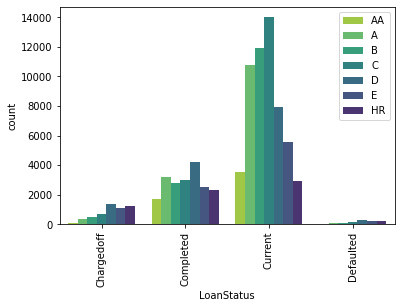

In [59]:
datas = new_df[(new_df.LoanStatus == 'Current') | (new_df.LoanStatus == 'Defaulted') | (new_df.LoanStatus == 'Chargedoff') | (new_df.LoanStatus == 'Completed')]

classes = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
prosp_classes = pd.api.types.CategoricalDtype(ordered=True, categories=classes)
datas['ProsperRating (Alpha)'] = datas['ProsperRating (Alpha)'].astype(prosp_classes)

sb.countplot(data = datas, x = datas['LoanStatus'].sort_values(), hue = 'ProsperRating (Alpha)', palette = 'viridis_r')
plt.xticks(rotation=90)
plt.legend(loc='upper right');

We can visually see that:
*  the 'D' rating is dominant in the Current LoanStatus, followed by 'B' and 'A'
*  in the Completed and Chargedoff status we see that the 'D' prosper rating is the dominant one 

### LoanStatus and ListingCategory

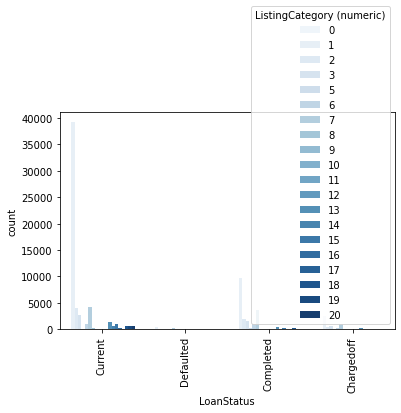

In [60]:
sb.countplot(data = datas, x = 'LoanStatus', hue = 'ListingCategory (numeric)', palette = 'Blues')
plt.xticks(rotation=90);

# in this case its not optimal to chack all of the listingCategory
# so we will invistigate only on the interesting one (1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 5 - Student Use, 6 - Auto )
# plus we don't really need the defaulted status so we will drop it

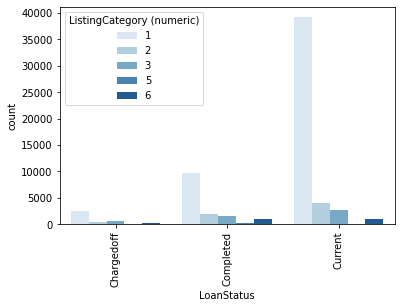

In [61]:
listings = [1,2,3,5,6]
datas = new_df[(new_df.LoanStatus == 'Current') | (new_df.LoanStatus == 'Chargedoff') | (new_df.LoanStatus == 'Completed')]
datas_2 = datas[(datas['ListingCategory (numeric)'] == 1)|(datas['ListingCategory (numeric)'] == 2)|(datas['ListingCategory (numeric)'] == 3)|(datas['ListingCategory (numeric)'] == 5)|(datas['ListingCategory (numeric)'] == 6)]

sb.countplot(data = datas_2, x = datas_2['LoanStatus'].sort_values(), hue = 'ListingCategory (numeric)', palette = 'Blues')
plt.xticks(rotation=90);

We observe that in the three loan status debt consolidation is the most frequent among them followed by home improvement

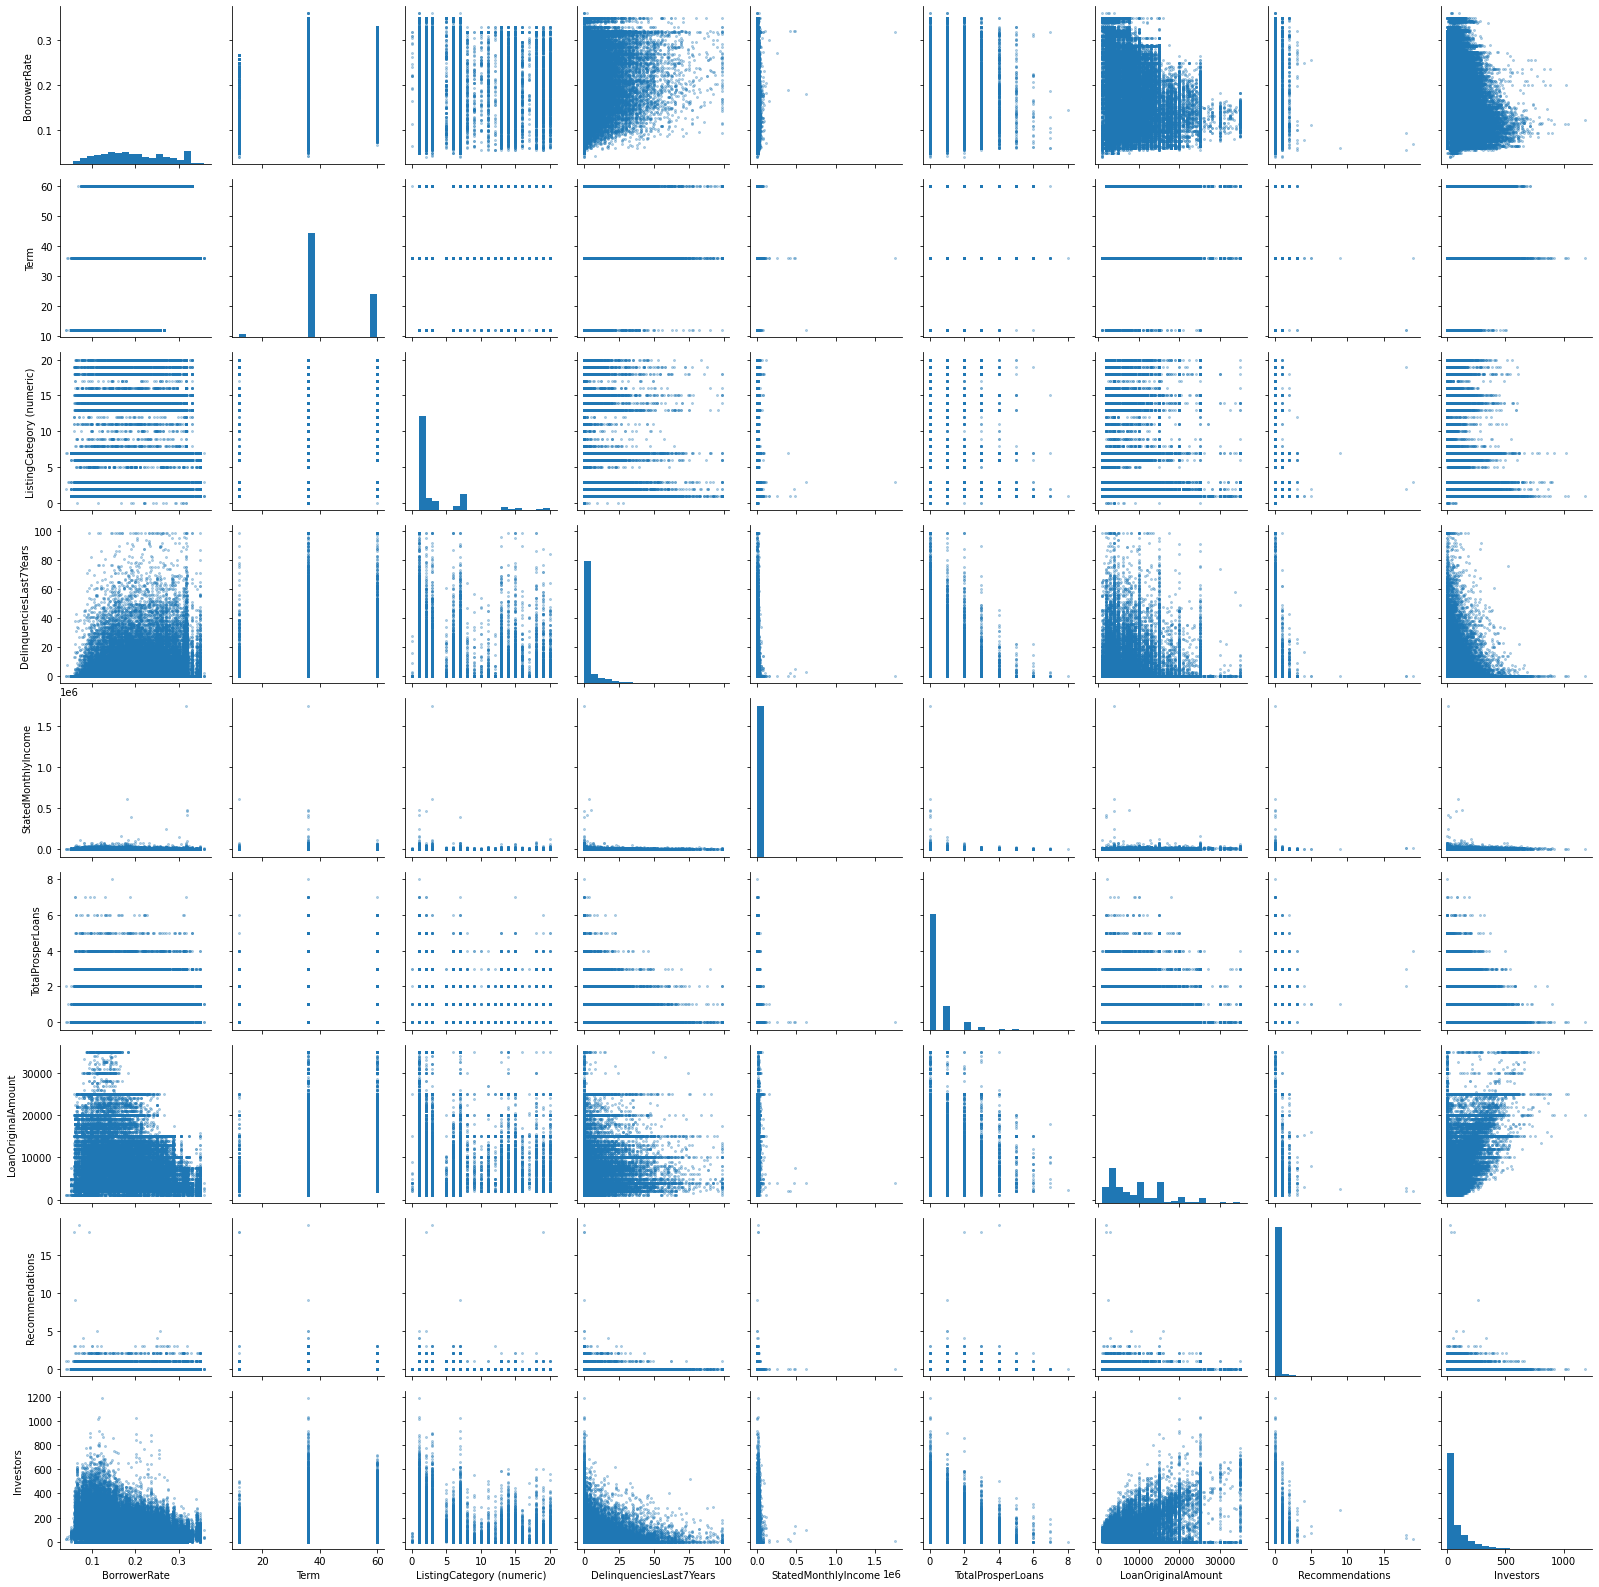

In [62]:
# Here we want to see if there is any plot that catch our eye for further investigation
variable_numeric = ['BorrowerRate','Term', 'ListingCategory (numeric)','DelinquenciesLast7Years','StatedMonthlyIncome' \
                    ,'TotalProsperLoans','LoanOriginalAmount','Recommendations','Investors']
g = sb.PairGrid(data = new_df, vars=variable_numeric)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, alpha=0.3, s=4)


I dont really see anything from this plot that caught my eye for further investigating

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> we notice that the there is a small correlation between loanOriginalAmount & Term and loanOriginalAmount & Investors.

> Plus, We observed that in the three loan status debt consolidation is the most frequent among them followed by home improvement.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> we found that the 'D' rating is dominant in all of the loan status's.

## Multivariate Exploration



In [63]:
new_df.head()

,LoanStatus,BorrowerRate,ProsperRating (Alpha),Term,ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors,LoanOriginationDate
0,Current,0.0920,A,36,2,Employed,0.0,6125.000000,0.0,10000,0,1,2014-03-03
1,Current,0.0974,A,36,16,Employed,14.0,2875.000000,0.0,10000,0,158,2012-11-01
2,Current,0.2085,D,36,2,Employed,0.0,9583.333333,1.0,15000,0,20,2013-09-20
3,Current,0.1314,B,60,1,Employed,0.0,8333.333333,0.0,15000,0,1,2013-12-24
4,Current,0.2712,E,36,1,Employed,0.0,2083.333333,0.0,3000,0,1,2013-04-18


### LoanOriginalAmount, LoanStatus and ProsperRating

<ipython-input-65-7069a7ac88ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas['ProsperRating (Alpha)'] = datas['ProsperRating (Alpha)'].astype(prosp_classes)


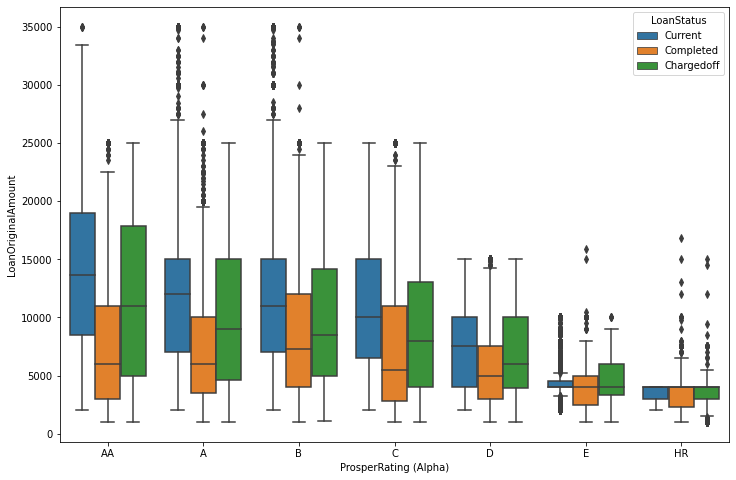

In [65]:
classes = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
prosp_classes = pd.api.types.CategoricalDtype(ordered=True, categories=classes)
datas['ProsperRating (Alpha)'] = datas['ProsperRating (Alpha)'].astype(prosp_classes)

plt.figure(figsize = [12, 8])
sb.boxplot(data=datas, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus');


We notice that there is the existance of outliers in the LoanOriginalAmount across all of the ProsperRating.
We also notice that other than 'E' and 'HR' ratings, the current loan status is the dominant one.

### LoanOriginalAmount, LoanStatus and ListingCategory 

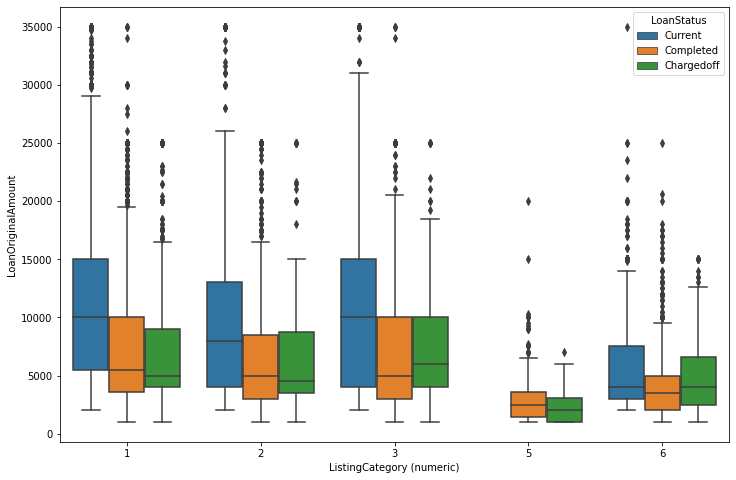

In [66]:
plt.figure(figsize = [12, 8])
sb.boxplot(data=datas_2, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus');

We can notice that the student loans (5) only have completed or chergedoff loan's, on the other listing categories we can see that the dominant loans are currents followed by the completed loan's

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> we noticed that the current loan's are spreed acroos the board even in different prosper ratingand different listing category

### Were there any interesting or surprising interactions between features?

> the student loan's didn't have a current loan in this dataset, they are either completed or chargedoff

## Conclusions
> in this dataset, we learned that majority of loans are current with a period of 36 months, we also saw that most of the borrowers are employed with average monthly income of 5000 dollars, with no previous loan's.

> Also, the popular type of loan are connected to debt, and home emprovement